In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

# View the data

In [20]:
INPUT_MAESTRO_DATA = "MAESTRO-d6178bdd-identified_variants_merged_protein_regions-main.tsv"
variants = pd.read_csv(INPUT_MAESTRO_DATA, sep="\t", low_memory = False)

In [21]:
variants.head()

,rowid,ccms_row_id,Algorithm,Filename,Cluster_index,Peptide,Unmodified_sequence,Charge,_dyn_#Intensity_for_cluster,_dyn_#Intensity_for_unmodified_sequence,...,PSP_site_match,DrugBank_drugs,Parent_mass,Num_PSP_Drugbank_events,Start_AA_1_based,End_AA_1_based,Num_spectra_for_cluster,Num_spectra_for_unmodified_sequence,Num_spectra_for_peptide_variant,Internal_ref_orig_intensity
0,1,1,.MODA.,specs_ms.mgf,960991,"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V",.GARLIPEMDQIFTEVEMTTLEK.,4,36.905893,36.905893,...,NaN,NaN,1580.81,0,NaN,NaN,1,1,1,8.204159e+03
1,2,2,.MODA.,specs_ms.mgf,763982,"I.[304.207]FTEVEMTTLE(K,304.207).V",.FTEVEMTTLEK.,3,11.686782,11.686782,...,NaN,NaN,1934.91,0,NaN,NaN,1,2,2,4.936894e+05
2,3,3,.MSGFPLUS.,specs_ms.mgf,902201,K.[304.207]LYQPEYQEVSTEEQR.E,.LYQPEYQEVSTEEQR.,3,15.690234,15.690234,...,NaN,NaN,2203.09,0,NaN,NaN,5,6,6,1.951566e+05
3,4,4,.MSGFPLUS.,specs_ms.mgf,935503,"K.[304.207]AANSLEAFIFETQD(K,304.207).L",.AANSLEAFIFETQDK.,3,15.016824,15.016824,...,NaN,NaN,2292.24,0,NaN,NaN,3,4,4,2.877781e+06
4,5,5,.MODA.,specs_ms.mgf,297961,"R.[304.207]YSHDF(N,-56.985)FH.I",.YSHDFNFH.,3,33.768015,33.768015,...,NaN,NaN,1313.66,0,NaN,NaN,3,3,3,7.088440e+04


In [22]:
# for c in variants.columns:
#     print(c)

# Preprocessing(severe or Non-severe)

In [23]:
variants_processed = variants[
    ['Peptide'] + [c for c in variants.columns if 'intensity_for_peptide_variant' in c]
]

variants_processed = variants_processed.copy()

variants_processed.replace(0.0, np.nan, inplace=True)

variants_processed = variants_processed.set_index('Peptide')

variants_processed = variants_processed.T

variants_processed.index = variants_processed.index.map(lambda x: '.'.join(x.split('.')[:2]))
# _dyn_#Empty.Empty.Empty..Empty.1_intensity_for_peptide_variant	
# _dyn_#Empty.Empty	
variants_processed['Condition'] = variants_processed.index.map(lambda x: x.split('.')[0])



In [24]:
variants_processed.head()

Peptide,"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V","I.[304.207]FTEVEMTTLE(K,304.207).V",K.[304.207]LYQPEYQEVSTEEQR.E,"K.[304.207]AANSLEAFIFETQD(K,304.207).L","R.[304.207]YSHDF(N,-56.985)FH.I","R.[304.207](P,143.096)SV(C,57.021)REAGPQAHMQQVTSSL(K,304.207).G",K.[304.207]QGSTGEEFHFQTGGR.D,"K.[304.207]HGTDDGVVW(M,15.995)NW(K,304.207).G","K.[304.207](H,100.027)GTDDGVVWMNW(K,304.207).G","K.[304.207]H(G,304.213)TDDGVVWMNW(K,304.207).G",...,"K.[304.207]YLGEE(Y,-57.005)V(K,304.207).A","K.[304.207]YLGEE(Y,-58.064)V(K,304.207).A","K.[304.207]YLGEE(Y,-60.599)V(K,304.207).A","K.[304.207]YLGEE(Y,-63.608)V(K,304.207).A","K.[304.207]YLGE(E,-68.078)YV(K,304.207).A","K.[304.207]YL(G,55.921)EEYV(K,304.207).A","K.{187.018}[304.207]YLGEEYV(K,304.207).A","R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A","K.[304.207]YLGE(E,125.898)YV(K,304.207).A",Condition
_dyn_#Empty.Empty,2.459416,0.961707,0.326271,0.878024,0.170619,0.570221,0.574879,0.914939,0.649916,0.017884,...,0.240862,0.787867,1.144694,0.929711,1.007395,0.353838,0.302468,0.735814,1.0683,_dyn_#Empty
_dyn_#Healthy.HC1,NaN,NaN,0.935916,NaN,NaN,NaN,NaN,NaN,NaN,0.288821,...,1.958825,NaN,NaN,1.174198,NaN,NaN,NaN,0.370040,NaN,_dyn_#Healthy
_dyn_#Healthy.HC10,6.645649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026024,...,2.544654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,_dyn_#Healthy
_dyn_#Healthy.HC12,3.391896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009033,...,0.913199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,_dyn_#Healthy
_dyn_#Healthy.HC13,1.919552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028415,...,1.035449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,_dyn_#Healthy


## Get features with high variants

In [25]:
variants_processed_var = variants_processed.var()

/var/folders/94/4_45zz7d0rsdx3jwtm2117r40000gn/T/ipykernel_6009/503785107.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variants_processed_var = variants_processed.var()


In [107]:
variants_with_var

Peptide
K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V      0.571345
I.[304.207]FTEVEMTTLE(K,304.207).V                 0.022256
K.[304.207]LYQPEYQEVSTEEQR.E                       0.098605
K.[304.207]AANSLEAFIFETQD(K,304.207).L             0.244187
R.[304.207]YSHDF(N,-56.985)FH.I                   40.841047
                                                    ...    
K.[304.207]YLGE(E,-68.078)YV(K,304.207).A          0.027665
K.[304.207]YL(G,55.921)EEYV(K,304.207).A           0.040271
K.{187.018}[304.207]YLGEEYV(K,304.207).A           0.058441
R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A     0.060827
K.[304.207]YLGE(E,125.898)YV(K,304.207).A          0.541515
Length: 100901, dtype: float64

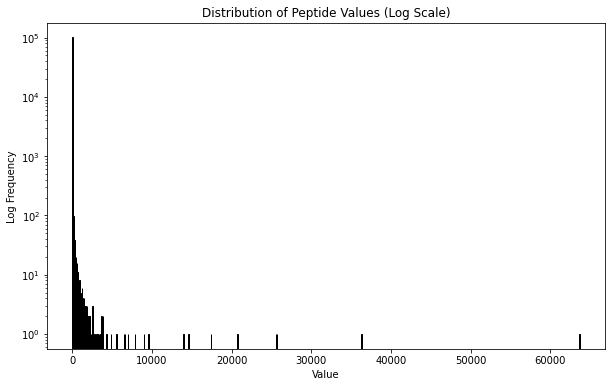

In [112]:
plt.figure(figsize=(10, 6))
plt.hist(variants_with_var, bins=1000, color='blue', edgecolor='black', log=True)
plt.title('Distribution of Peptide Values (Log Scale)')
plt.xlabel('Value')
plt.ylabel('Log Frequency')
plt.show()

In [113]:
variants_with_var = variants_with_var.dropna()
percentile_99 = np.percentile(variants_with_var, 99.99)
print("Our variants threshold is ", percentile_99)

Our variants threshold is  7811.742818509806


In [114]:
high_variance_features = variants_with_var[variants_with_var > percentile_99]  # keep only values higher than the 99th percentile
high_variance_features.sort_values(ascending=False)
top_6_peptides_names = high_variance_features.nlargest(6).index
top_6_peptides_names

Index(['K.[304.207](K,304.207)QTALVELV(K,348.165).H',
       'Q.[304.207]TALVELV(K,304.207).H',
       'R.[304.207](F,-57.06)(K,304.207)DLGEENF(K,304.207).A',
       'R.[304.207]LASYLD(K,304.207)VR.A',
       'K.{43.996}[304.207]GSFPWQA(K,304.207).M',
       'K.[304.207](E,262.515)QL(K,304.207)AVMDDFAAFVE(K,304.207).C'],
      dtype='object', name='Peptide')

In [115]:
print("how many high_variance_features, ", len(high_variance_features))


how many high_variance_features,  11


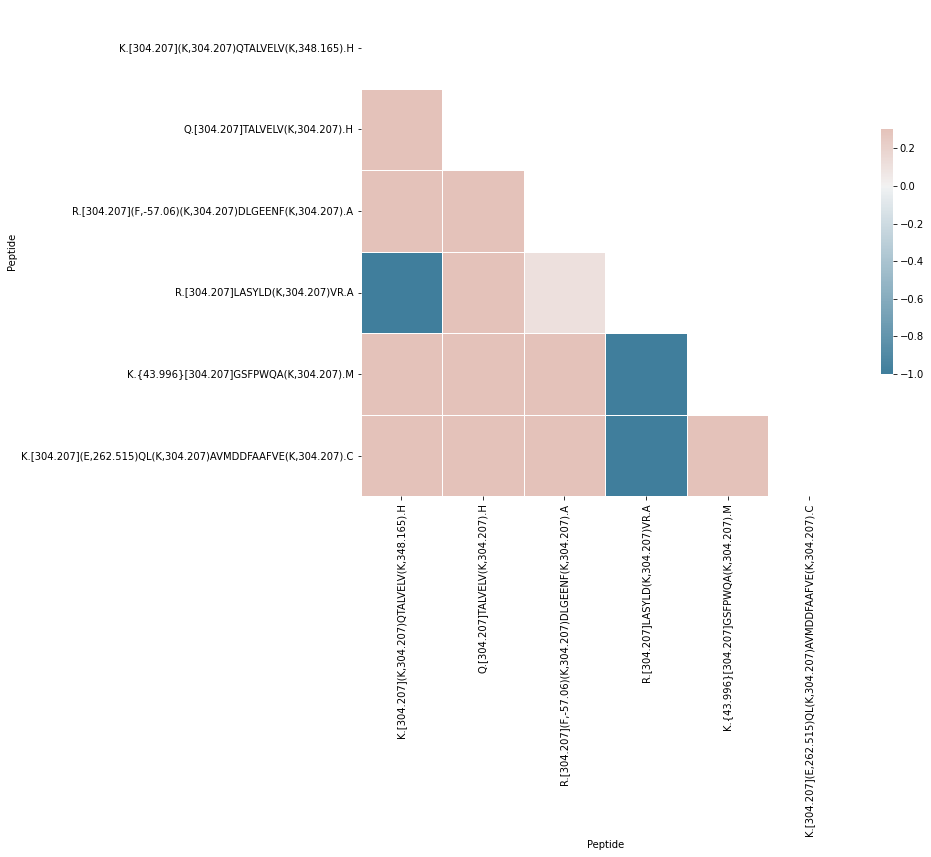

Peptide,"K.[304.207](K,304.207)QTALVELV(K,348.165).H","Q.[304.207]TALVELV(K,304.207).H","R.[304.207](F,-57.06)(K,304.207)DLGEENF(K,304.207).A","R.[304.207]LASYLD(K,304.207)VR.A","K.{43.996}[304.207]GSFPWQA(K,304.207).M","K.[304.207](E,262.515)QL(K,304.207)AVMDDFAAFVE(K,304.207).C"
Peptide,,,,,,
"K.[304.207](K,304.207)QTALVELV(K,348.165).H",1.000000,1.000000,0.997354,-1.000000,0.998824,0.925461
"Q.[304.207]TALVELV(K,304.207).H",1.000000,1.000000,0.984439,0.909779,1.000000,1.000000
"R.[304.207](F,-57.06)(K,304.207)DLGEENF(K,304.207).A",0.997354,0.984439,1.000000,0.115429,0.947470,0.999842
"R.[304.207]LASYLD(K,304.207)VR.A",-1.000000,0.909779,0.115429,1.000000,-1.000000,-1.000000
"K.{43.996}[304.207]GSFPWQA(K,304.207).M",0.998824,1.000000,0.947470,-1.000000,1.000000,0.926582
"K.[304.207](E,262.515)QL(K,304.207)AVMDDFAAFVE(K,304.207).C",0.925461,1.000000,0.999842,-1.000000,0.926582,1.000000


In [116]:
top_6_peptides_data = variants_processed[top_6_peptides_names]
corr_matrix = top_6_peptides_data.corr()

# Generate a mask for the upper triangle (optional)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()
corr_matrix

### From the correlation matrix above, we can see that:

"K.304.207QTALVELV(K,348.165).H" has a correlation of 1.0 with "Q.[304.207]TALVELV(K,304.207).H", and "K.{43.996}[304.207]GSFPWQA(K,304.207).M". We can remove either of them.

"Q.[304.207]TALVELV(K,304.207).H" also has a correlation of 1.0 with "K.{43.996}[304.207]GSFPWQA(K,304.207).M", and "K.304.207QL(K,304.207)AVMDDFAAFVE(K,304.207).C". We can remove either of them.

"R.304.207(K,304.207)DLGEENF(K,304.207).A" has a correlation of 0.999842 with "K.304.207QL(K,304.207)AVMDDFAAFVE(K,304.207).C". We can remove either of them.

In this way, We will remove "K.{43.996}[304.207]GSFPWQA(K,304.207).M" and "K.304.207QL(K,304.207)AVMDDFAAFVE(K,304.207).C" and keep the rest 4 features




In [118]:
columns_to_keep = ["K.[304.207](K,304.207)QTALVELV(K,348.165).H", 
                   "Q.[304.207]TALVELV(K,304.207).H", 
                   "R.[304.207](F,-57.06)(K,304.207)DLGEENF(K,304.207).A", 
                   "R.[304.207]LASYLD(K,304.207)VR.A"]

variants_processed = variants_processed[columns_to_keep]


Peptide,"K.[304.207](K,304.207)QTALVELV(K,348.165).H","Q.[304.207]TALVELV(K,304.207).H","R.[304.207](F,-57.06)(K,304.207)DLGEENF(K,304.207).A","R.[304.207]LASYLD(K,304.207)VR.A"
_dyn_#Empty.Empty,5.885849,1.988086,6.027371,0.769364
_dyn_#Healthy.HC1,NaN,NaN,11.851476,NaN
_dyn_#Healthy.HC10,NaN,16.874370,9.650905,NaN
_dyn_#Healthy.HC12,NaN,3.049337,2.124396,NaN
_dyn_#Healthy.HC13,NaN,11.744248,9.426140,NaN
...,...,...,...,...
_dyn_#Symptomatic-non-COVID-19.JBDZ6,NaN,NaN,0.623599,NaN
_dyn_#Symptomatic-non-COVID-19.JBDZ7,NaN,NaN,0.649596,NaN
_dyn_#Symptomatic-non-COVID-19.JBDZ8,NaN,NaN,0.526410,NaN
_dyn_#Symptomatic-non-COVID-19.JBDZ9,NaN,NaN,0.277585,NaN


### This are 4 features we got from corrlation analysis and variants analysis we got 



In [119]:
variants_processed

Peptide,"K.[304.207](K,304.207)QTALVELV(K,348.165).H","Q.[304.207]TALVELV(K,304.207).H","R.[304.207](F,-57.06)(K,304.207)DLGEENF(K,304.207).A","R.[304.207]LASYLD(K,304.207)VR.A"
_dyn_#Empty.Empty,5.885849,1.988086,6.027371,0.769364
_dyn_#Healthy.HC1,NaN,NaN,11.851476,NaN
_dyn_#Healthy.HC10,NaN,16.874370,9.650905,NaN
_dyn_#Healthy.HC12,NaN,3.049337,2.124396,NaN
_dyn_#Healthy.HC13,NaN,11.744248,9.426140,NaN
...,...,...,...,...
_dyn_#Symptomatic-non-COVID-19.JBDZ6,NaN,NaN,0.623599,NaN
_dyn_#Symptomatic-non-COVID-19.JBDZ7,NaN,NaN,0.649596,NaN
_dyn_#Symptomatic-non-COVID-19.JBDZ8,NaN,NaN,0.526410,NaN
_dyn_#Symptomatic-non-COVID-19.JBDZ9,NaN,NaN,0.277585,NaN


### TODO:
    1. var distribution data, get top 1%; bar graph, Y -> count X -> value
    2. correlation, select top 6 to get corrlations, legend to show which 6 petitode
    3. only get 100 petitde
    

3. Scatter Graph, numercic data, one column to see distribution
4. Bar Graph, category